In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

In [2]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [3]:
df = pd.read_csv("/Users/ksr/Datasets/digit-recognizer/train.csv")#reading the dataset

In [4]:
df.head(5)#first 5 rows of dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target = df["label"]#stroing label in target variable
df.drop("label",axis = 1,inplace = True)#deleting label in the df

In [6]:
df.shape

(42000, 784)

In [7]:
target.shape

(42000,)

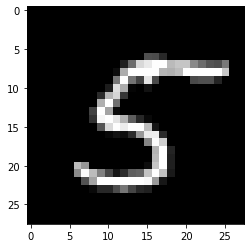

5


In [8]:
#display one of the image 
random = np.random.randint(0,42000)#generating random number in the range of data size
data = df.iloc[random].to_numpy().reshape(28,28)#to_numpy is same as as_matrix
plt.imshow(data,cmap="gray")
plt.show()
print(target[random])#label of the image

#Principle Component Analysis

steps for PCA:
        1.Variance Maximisation
        2.Distance Minimisation

1.Compute the mean for dimensions
2.Compute the co-variance matrix for whole dataset
3.Compute the Eigen-values and Eigen-vectors
4.sort the eigen-vectors by desc the eigen-values and then choose the k eigen vectors(k-largest eigen-vectors)
5.transform the samples into new-samples

https://sebastianraschka.com/Articles/2014_pca_step_by_step.html
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [9]:
#standarising the data
#x-xmean/xs.d
df = StandardScaler().fit_transform(df)

In [10]:
#calculating co-variance matrix
cov_df = np.matmul(df.T,df)

In [11]:
cov_df.shape#shape of our cov-matrix

(784, 784)

In [12]:
#calculating eigen values and eigen vectors
eig_values,eig_vectors = eigh(cov_df,eigvals=(782,783))#getting last to eigen values as it returns in ascending order

In [13]:
eig_vectors.shape

(784, 2)

In [14]:
eig_vectors = eig_vectors.T#TO visualize the data transposing the matrix in 2-d

In [15]:
df_new = np.matmul(eig_vectors,df.T)

In [16]:
df_new.shape

(2, 42000)

https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

In [17]:
df_new = np.vstack((df_new,target)).T

In [18]:
df_new = pd.DataFrame(data = df_new,columns=("p1","p2","labels"))#converting into list/array to data frame

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

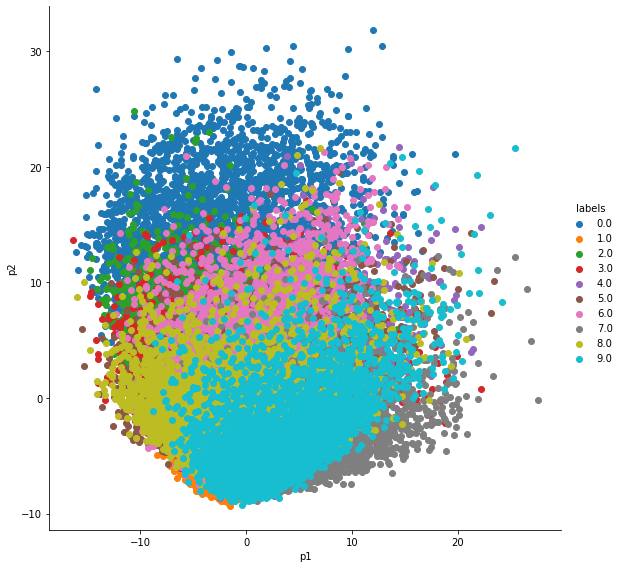

In [19]:
sns.FacetGrid(data = df_new,hue="labels",height = 8).map(plt.scatter,"p1","p2").add_legend()